In [2]:
import PIL, os, cv2
import numpy as np
import pandas as pd
import plotly.express as px
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
def get_data(dir_path):
    x, y = [], []
    category = {"Non Mask":0,"Mask":1}
    folders = os.listdir(dir_path)
    for folder in folders:
        folder_path = os.path.join(dir_path,folder)
        files = os.listdir(folder_path)
        for file in files:
            file_path = os.path.join(folder_path,file)
            x.append(cv2.resize(cv2.imread(file_path),(224,224)))
            y.append(category[folder])
        print(folder,"Folder Done")
    x = np.array(x)
    y = np.array(y)
    x,y = shuffle(x,y)
    x = x / 255
    print("Shuffle and feature scaling Done")
    print("X Shape :",x.shape)
    print('Y Shape :',y.shape)
    print("Unique Categories :",np.unique(y,return_counts=True)[0])
    print("Unique Categories counts :",np.unique(y,return_counts=True)[1])
    return x, y

In [4]:
xtrain, ytrain = get_data('C:/Users/yaswa/OneDrive/Desktop/Face_Mask_Detection/dataset/New_Masks_Dataset/Train')

Mask Folder Done
Non Mask Folder Done
Shuffle and feature scaling Done
X Shape : (600, 224, 224, 3)
Y Shape : (600,)
Unique Categories : [0 1]
Unique Categories counts : [300 300]


In [5]:
xvalid, yvalid = get_data('C:/Users/yaswa/OneDrive/Desktop/Face_Mask_Detection/dataset/New_Masks_Dataset/Validation')

Mask Folder Done
Non Mask Folder Done
Shuffle and feature scaling Done
X Shape : (306, 224, 224, 3)
Y Shape : (306,)
Unique Categories : [0 1]
Unique Categories counts : [153 153]


In [6]:
xtest, ytest = get_data('C:/Users/yaswa/OneDrive/Desktop/Face_Mask_Detection/dataset/New_Masks_Dataset/Test')

Mask Folder Done
Non Mask Folder Done
Shuffle and feature scaling Done
X Shape : (100, 224, 224, 3)
Y Shape : (100,)
Unique Categories : [0 1]
Unique Categories counts : [50 50]


#Developing a Convolution Neural Network model

In [7]:
cnn1 = keras.Sequential(
    
                            [
                                
                                # Input
                                keras.layers.Input(shape=(224,224,3)),
                                
                                # CNN
                                keras.layers.Conv2D(200,(3,3),padding='same',activation='relu'),
                                keras.layers.Dropout(0.75),
                                keras.layers.MaxPool2D((2,2),padding='valid'),
                                keras.layers.Conv2D(200,(3,3),padding='same',activation='relu'),
                                keras.layers.Dropout(0.50),
                                keras.layers.MaxPool2D((2,2),padding='valid'),
                                keras.layers.Conv2D(200,(3,3),padding='same',activation='relu'),
                                keras.layers.Dropout(0.25),
                                keras.layers.MaxPool2D((2,2),padding='valid'),
                                keras.layers.Conv2D(200,(3,3),padding='same',activation='relu'),
                                keras.layers.MaxPool2D((2,2),padding='valid'),
                                
                                # Flatten
                                keras.layers.Flatten(),
                                
                                # Dense
                                keras.layers.Dense(100,activation='relu'),
                                keras.layers.Dense(50,activation='relu'),
                                keras.layers.Dense(10,activation='relu'),
                                
                                # Output
                                keras.layers.Dense(1,activation='sigmoid'),
                                
                            ]
    
                        )

cnn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 200)     5600      
                                                                 
 dropout (Dropout)           (None, 224, 224, 200)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 200)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 200)     360200    
                                                                 
 dropout_1 (Dropout)         (None, 112, 112, 200)     0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 200)      0         
 2D)                                                    

In [12]:
keras.utils.plot_model(cnn1)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [13]:
cnn1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
training1 = cnn1.fit(xtrain,ytrain,batch_size=10,validation_data=(xvalid,yvalid),epochs=10)

Epoch 1/10
60/60 [==============================] - 219s 4s/step - loss: 0.8099 - accuracy: 0.5483 - val_loss: 0.6911 - val_accuracy: 0.4967
Epoch 2/10
60/60 [==============================] - 216s 4s/step - loss: 0.5654 - accuracy: 0.7283 - val_loss: 0.6289 - val_accuracy: 0.7647
Epoch 3/10
60/60 [==============================] - 212s 4s/step - loss: 0.4530 - accuracy: 0.8100 - val_loss: 0.6390 - val_accuracy: 0.6895
Epoch 4/10
60/60 [==============================] - 205s 3s/step - loss: 0.4283 - accuracy: 0.8167 - val_loss: 0.5865 - val_accuracy: 0.8170
Epoch 5/10
60/60 [==============================] - 207s 3s/step - loss: 0.3444 - accuracy: 0.8517 - val_loss: 0.6029 - val_accuracy: 0.7647
Epoch 6/10
60/60 [==============================] - 207s 3s/step - loss: 0.3646 - accuracy: 0.8383 - val_loss: 0.5948 - val_accuracy: 0.8105
Epoch 7/10
60/60 [==============================] - 210s 3s/step - loss: 0.2872 - accuracy: 0.8783 - val_loss: 0.5505 - val_accuracy: 0.7908
Epoch 8/10
60

In [14]:
training_history1 = pd.DataFrame(training1.history)
training_history1

,loss,accuracy,val_loss,val_accuracy
0,0.809897,0.548333,0.691106,0.496732
1,0.565428,0.728333,0.628940,0.764706
2,0.453017,0.810000,0.638967,0.689542
3,0.428269,0.816667,0.586487,0.816993
4,0.344401,0.851667,0.602938,0.764706
5,0.364637,0.838333,0.594795,0.810458
6,0.287192,0.878333,0.550464,0.790850
7,0.216435,0.900000,0.541731,0.807190
8,0.244649,0.876667,0.495701,0.830065
9,0.144851,0.926667,0.543042,0.718954


In [15]:
fig1 = px.line(training_history1[['loss','val_loss']],labels={'value':'<-- Loss','index':'Epochs -->'})
fig1.update_layout(title={'text':'Loss Per Epochs','font_size':23,'font_color':'orange','font_family':'Georgia','x':0.5})
fig1.show()
fig1 = px.line(training_history1[['accuracy','val_accuracy']],labels={'value':'Accuracy -->','index':'Epochs -->'})
fig1.update_layout(title={'text':'Accuracy Per Epochs','font_size':23,'font_color':'orange','font_family':'Georgia','x':0.5})
fig1.show()


In [16]:
ypred = []
for pred in cnn1.predict(xtest):
    if pred > 0.5 :
        ypred.append(1)
    else : 
        ypred.append(0)
ypred = np.array(ypred)
print('\n\nConfusion Matrix : \n\n',confusion_matrix(ytest,ypred))
print('\n\nClassification Report : \n\n',classification_report(ytest,ypred))

4/4 [==============================] - 6s 1s/step


Confusion Matrix : 

 [[32 18]
 [ 5 45]]


Classification Report : 

               precision    recall  f1-score   support

           0       0.86      0.64      0.74        50
           1       0.71      0.90      0.80        50

    accuracy                           0.77       100
   macro avg       0.79      0.77      0.77       100
weighted avg       0.79      0.77      0.77       100



In [17]:
cnn2 = keras.Sequential(
    
                            [
                                
                                # Input
                                keras.layers.Input(shape=(224,224,3)),
                                
                                # CNN
                                keras.layers.Conv2D(200,(3,3),padding='same',activation='relu'),
                                keras.layers.Dropout(0.8),
                                keras.layers.MaxPool2D((2,2),padding='valid'),
                                keras.layers.Conv2D(200,(3,3),padding='same',activation='relu'),
                                keras.layers.Dropout(0.6),
                                keras.layers.MaxPool2D((2,2),padding='valid'),
                                keras.layers.Conv2D(200,(3,3),padding='same',activation='relu'),
                                keras.layers.Dropout(0.4),
                                keras.layers.Conv2D(200,(3,3),padding='same',activation='relu'),
                                keras.layers.Dropout(0.2),
                                keras.layers.MaxPool2D((2,2),padding='valid'),
                                keras.layers.Conv2D(200,(3,3),padding='same',activation='relu'),
                                keras.layers.MaxPool2D((2,2),padding='valid'),
                                
                                # Flatten
                                keras.layers.Flatten(),
                                
                                # Dense
                                keras.layers.Dense(100,activation='relu'),
                                keras.layers.Dense(50,activation='relu'),
                                keras.layers.Dense(20,activation='relu'),
                                
                                # Output
                                keras.layers.Dense(1,activation='sigmoid'),
                                
                            ]
    
                        )

cnn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 200)     5600      
                                                                 
 dropout_3 (Dropout)         (None, 224, 224, 200)     0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 200)    0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 200)     360200    
                                                                 
 dropout_4 (Dropout)         (None, 112, 112, 200)     0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 56, 56, 200)      0         
 2D)                                                  

In [18]:
keras.utils.plot_model(cnn2)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [19]:
cnn2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
training2 = cnn2.fit(xtrain,ytrain,batch_size=20,validation_data=(xvalid,yvalid),epochs=10)

Epoch 1/10
30/30 [==============================] - 224s 7s/step - loss: 0.7716 - accuracy: 0.4883 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
30/30 [==============================] - 217s 7s/step - loss: 0.6879 - accuracy: 0.5583 - val_loss: 0.6920 - val_accuracy: 0.5556
Epoch 3/10
30/30 [==============================] - 215s 7s/step - loss: 0.6020 - accuracy: 0.7250 - val_loss: 0.6858 - val_accuracy: 0.7876
Epoch 4/10
30/30 [==============================] - 215s 7s/step - loss: 0.4444 - accuracy: 0.8250 - val_loss: 0.5633 - val_accuracy: 0.8856
Epoch 5/10
30/30 [==============================] - 218s 7s/step - loss: 0.3788 - accuracy: 0.8500 - val_loss: 0.5752 - val_accuracy: 0.8660
Epoch 6/10
30/30 [==============================] - 241s 8s/step - loss: 0.3271 - accuracy: 0.8867 - val_loss: 0.5557 - val_accuracy: 0.8693
Epoch 7/10
30/30 [==============================] - 246s 8s/step - loss: 0.2668 - accuracy: 0.8983 - val_loss: 0.5731 - val_accuracy: 0.8954
Epoch 8/10
30

In [20]:
training_history2 = pd.DataFrame(training2.history)
training_history2

,loss,accuracy,val_loss,val_accuracy
0,0.771629,0.488333,0.693165,0.500000
1,0.687888,0.558333,0.691997,0.555556
2,0.602028,0.725000,0.685772,0.787582
3,0.444399,0.825000,0.563318,0.885621
4,0.378844,0.850000,0.575243,0.866013
5,0.327086,0.886667,0.555657,0.869281
6,0.266830,0.898333,0.573061,0.895425
7,0.211909,0.913333,0.550563,0.888889
8,0.178939,0.925000,0.488692,0.882353
9,0.222787,0.923333,0.542015,0.905229


In [21]:
fig2 = px.line(training_history2[['loss','val_loss']],labels={'value':'<-- Loss','index':'Epochs -->'})
fig2.update_layout(title={'text':'Loss Per Epochs','font_size':23,'font_color':'orange','font_family':'Georgia','x':0.5})
fig2.show()
fig2 = px.line(training_history2[['accuracy','val_accuracy']],labels={'value':'Accuracy -->','index':'Epochs -->'})
fig2.update_layout(title={'text':'Accuracy Per Epochs','font_size':23,'font_color':'orange','font_family':'Georgia','x':0.5})
fig2.show()

In [22]:
ypred = []
for pred in cnn2.predict(xtest):
    if pred > 0.5 :
        ypred.append(1)
    else : 
        ypred.append(0)
ypred = np.array(ypred)
print('\n\nConfusion Matrix : \n\n',confusion_matrix(ytest,ypred))
print('\n\nClassification Report : \n\n',classification_report(ytest,ypred))

4/4 [==============================] - 7s 2s/step


Confusion Matrix : 

 [[47  3]
 [ 4 46]]


Classification Report : 

               precision    recall  f1-score   support

           0       0.92      0.94      0.93        50
           1       0.94      0.92      0.93        50

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



In [42]:
cnn3 = keras.Sequential(
    
                            [
                                
                                # Input
                                keras.layers.Input(shape=(224,224,3)),
                                
                                # CNN
                                keras.layers.Conv2D(200,(3,3),padding='same',activation='relu'),
                                keras.layers.Dropout(0.75),
                                keras.layers.MaxPool2D((2,2),padding='valid'),
                                keras.layers.Conv2D(200,(3,3),padding='same',activation='relu'),
                                keras.layers.Dropout(0.50),
                                keras.layers.MaxPool2D((2,2),padding='valid'),
                                keras.layers.Conv2D(200,(3,3),padding='same',activation='relu'),
                                keras.layers.Dropout(0.25),
                                keras.layers.MaxPool2D((2,2),padding='valid'),
                                keras.layers.Conv2D(200,(3,3),padding='same',activation='relu'),
                                keras.layers.MaxPool2D((2,2),padding='valid'),
                                keras.layers.Conv2D(200,(3,3),padding='same',activation='relu'),
                                keras.layers.MaxPool2D((2,2),padding='valid'),
                                
                                # Flatten
                                keras.layers.Flatten(),
                                
                                # Dense
                                keras.layers.Dense(100,activation='relu'),
                                keras.layers.Dense(50,activation='relu'),
                                keras.layers.Dense(10,activation='relu'),
                                
                                # Output
                                keras.layers.Dense(1,activation='sigmoid'),
                                
                            ]
    
                        )

cnn3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 224, 224, 200)     5600      
                                                                 
 dropout_14 (Dropout)        (None, 224, 224, 200)     0         
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 112, 112, 200)    0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 112, 112, 200)     360200    
                                                                 
 dropout_15 (Dropout)        (None, 112, 112, 200)     0         
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 56, 56, 200)      0         
 g2D)                                                 

In [43]:
keras.utils.plot_model(cnn3)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [44]:
cnn3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
training3 = cnn3.fit(xtrain,ytrain,batch_size=15,validation_data=(xvalid,yvalid),epochs=10)

Epoch 1/10
40/40 [==============================] - 218s 5s/step - loss: 0.7270 - accuracy: 0.5300 - val_loss: 0.6921 - val_accuracy: 0.5588
Epoch 2/10
40/40 [==============================] - 201s 5s/step - loss: 0.5594 - accuracy: 0.7750 - val_loss: 0.5631 - val_accuracy: 0.8366
Epoch 3/10
40/40 [==============================] - 206s 5s/step - loss: 0.5033 - accuracy: 0.7767 - val_loss: 0.6214 - val_accuracy: 0.7778
Epoch 4/10
40/40 [==============================] - 206s 5s/step - loss: 0.4276 - accuracy: 0.8283 - val_loss: 0.5875 - val_accuracy: 0.7288
Epoch 5/10
40/40 [==============================] - 207s 5s/step - loss: 0.2830 - accuracy: 0.8917 - val_loss: 0.4779 - val_accuracy: 0.9118
Epoch 6/10
40/40 [==============================] - 206s 5s/step - loss: 0.3031 - accuracy: 0.8933 - val_loss: 0.5862 - val_accuracy: 0.8529
Epoch 7/10
40/40 [==============================] - 204s 5s/step - loss: 0.2944 - accuracy: 0.8817 - val_loss: 0.4607 - val_accuracy: 0.7876
Epoch 8/10
40

In [45]:
training_history3 = pd.DataFrame(training3.history)
training_history3

,loss,accuracy,val_loss,val_accuracy
0,0.726962,0.530000,0.692144,0.558824
1,0.559408,0.775000,0.563136,0.836601
2,0.503252,0.776667,0.621430,0.777778
3,0.427585,0.828333,0.587513,0.728758
4,0.283016,0.891667,0.477886,0.911765
5,0.303061,0.893333,0.586184,0.852941
6,0.294434,0.881667,0.460680,0.787582
7,0.262213,0.901667,0.463983,0.866013
8,0.175418,0.925000,0.371831,0.905229
9,0.157471,0.950000,0.494380,0.790850


In [46]:
fig3 = px.line(training_history3[['loss','val_loss']],labels={'value':'<-- Loss','index':'Epochs -->'})
fig3.update_layout(title={'text':'Loss Per Epochs','font_size':23,'font_color':'orange','font_family':'Georgia','x':0.5})
fig3.show()
fig3 = px.line(training_history3[['accuracy','val_accuracy']],labels={'value':'Accuracy -->','index':'Epochs -->'})
fig3.update_layout(title={'text':'Accuracy Per Epochs','font_size':23,'font_color':'orange','font_family':'Georgia','x':0.5})
fig3.show()

In [47]:
ypred = []
for pred in cnn3.predict(xtest):
    if pred > 0.5 :
        ypred.append(1)
    else : 
        ypred.append(0)
ypred = np.array(ypred)
print('\n\nConfusion Matrix : \n\n',confusion_matrix(ytest,ypred))
print('\n\nClassification Report : \n\n',classification_report(ytest,ypred))

4/4 [==============================] - 6s 1s/step


Confusion Matrix : 

 [[29 21]
 [ 1 49]]


Classification Report : 

               precision    recall  f1-score   support

           0       0.97      0.58      0.72        50
           1       0.70      0.98      0.82        50

    accuracy                           0.78       100
   macro avg       0.83      0.78      0.77       100
weighted avg       0.83      0.78      0.77       100



In [29]:
cnn4 = keras.Sequential(
    
                            [
                                
                                # Input
                                keras.layers.Input(shape=(224,224,3)),
                                
                                # CNN
                                keras.layers.Conv2D(100,(3,3),padding='same',activation='relu'),
                                keras.layers.Dropout(0.75),
                                keras.layers.MaxPool2D((2,2),padding='valid'),
                                keras.layers.Conv2D(100,(3,3),padding='same',activation='relu'),
                                keras.layers.Dropout(0.50),
                                keras.layers.MaxPool2D((2,2),padding='valid'),
                                keras.layers.Conv2D(100,(3,3),padding='same',activation='relu'),
                                keras.layers.MaxPool2D((2,2),padding='valid'),
                                
                                # Flatten
                                keras.layers.Flatten(),
                                
                                # Dense
                                keras.layers.Dense(100,activation='relu'),
                                keras.layers.Dense(50,activation='relu'),
                                keras.layers.Dense(10,activation='relu'),
                                
                                # Output
                                keras.layers.Dense(1,activation='sigmoid'),
                                
                            ]
    
                        )

cnn4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 224, 224, 100)     2800      
                                                                 
 dropout_10 (Dropout)        (None, 224, 224, 100)     0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 112, 112, 100)    0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 100)     90100     
                                                                 
 dropout_11 (Dropout)        (None, 112, 112, 100)     0         
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 56, 56, 100)      0         
 g2D)                                                 

In [30]:
keras.utils.plot_model(cnn4)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [31]:
cnn4.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
training4 = cnn4.fit(xtrain,ytrain,batch_size=10,validation_data=(xvalid,yvalid),epochs=10)

Epoch 1/10
60/60 [==============================] - 95s 2s/step - loss: 0.7714 - accuracy: 0.5633 - val_loss: 0.6743 - val_accuracy: 0.5294
Epoch 2/10
60/60 [==============================] - 94s 2s/step - loss: 0.4839 - accuracy: 0.8000 - val_loss: 0.6266 - val_accuracy: 0.7288
Epoch 3/10
60/60 [==============================] - 93s 2s/step - loss: 0.2777 - accuracy: 0.8833 - val_loss: 0.3932 - val_accuracy: 0.8987
Epoch 4/10
60/60 [==============================] - 94s 2s/step - loss: 0.2492 - accuracy: 0.9000 - val_loss: 0.5131 - val_accuracy: 0.8725
Epoch 5/10
60/60 [==============================] - 94s 2s/step - loss: 0.1904 - accuracy: 0.9300 - val_loss: 0.4751 - val_accuracy: 0.8725
Epoch 6/10
60/60 [==============================] - 94s 2s/step - loss: 0.1654 - accuracy: 0.9350 - val_loss: 0.4075 - val_accuracy: 0.8954
Epoch 7/10
60/60 [==============================] - 94s 2s/step - loss: 0.1189 - accuracy: 0.9517 - val_loss: 0.3533 - val_accuracy: 0.8987
Epoch 8/10
60/60 [==

In [32]:
training_history4 = pd.DataFrame(training4.history)
training_history4

,loss,accuracy,val_loss,val_accuracy
0,0.771360,0.563333,0.674306,0.529412
1,0.483851,0.800000,0.626624,0.728758
2,0.277709,0.883333,0.393249,0.898693
3,0.249232,0.900000,0.513121,0.872549
4,0.190387,0.930000,0.475063,0.872549
5,0.165446,0.935000,0.407524,0.895425
6,0.118863,0.951667,0.353304,0.898693
7,0.078182,0.971667,0.412709,0.820261
8,0.171758,0.928333,0.311311,0.918301
9,0.086499,0.960000,0.373184,0.820261


In [33]:
fig4 = px.line(training_history4[['loss','val_loss']],labels={'value':'<-- Loss','index':'Epochs -->'})
fig4.update_layout(title={'text':'Loss Per Epochs','font_size':23,'font_color':'orange','font_family':'Georgia','x':0.5})
fig4.show()
fig4 = px.line(training_history4[['accuracy','val_accuracy']],labels={'value':'Accuracy -->','index':'Epochs -->'})
fig4.update_layout(title={'text':'Accuracy Per Epochs','font_size':23,'font_color':'orange','font_family':'Georgia','x':0.5})
fig4.show()

In [34]:
ypred = []
for pred in cnn4.predict(xtest):
    if pred > 0.5 :
        ypred.append(1)
    else : 
        ypred.append(0)
ypred = np.array(ypred)
print('\n\nConfusion Matrix : \n\n',confusion_matrix(ytest,ypred))
print('\n\nClassification Report : \n\n',classification_report(ytest,ypred))

4/4 [==============================] - 2s 442ms/step


Confusion Matrix : 

 [[33 17]
 [ 4 46]]


Classification Report : 

               precision    recall  f1-score   support

           0       0.89      0.66      0.76        50
           1       0.73      0.92      0.81        50

    accuracy                           0.79       100
   macro avg       0.81      0.79      0.79       100
weighted avg       0.81      0.79      0.79       100



In [35]:
cnn5 = keras.Sequential(
    
                            [
                                
                                # Input
                                keras.layers.Input(shape=(224,224,3)),
                                
                                # CNN
                                keras.layers.Conv2D(100,(3,3),padding='same',activation='relu'),
                                keras.layers.Dropout(0.75),
                                keras.layers.MaxPool2D((2,2),padding='valid'),
                                keras.layers.Conv2D(100,(3,3),padding='same',activation='relu'),
                                keras.layers.Dropout(0.50),
                                keras.layers.MaxPool2D((2,2),padding='valid'),
                                keras.layers.Conv2D(100,(3,3),padding='same',activation='relu'),
                                keras.layers.Conv2D(100,(3,3),padding='same',activation='relu'),
                                keras.layers.MaxPool2D((2,2),padding='valid'),
                                
                                # Flatten
                                keras.layers.Flatten(),
                                
                                # Dense
                                keras.layers.Dense(100,activation='relu'),
                                keras.layers.Dense(10,activation='relu'),
                                
                                # Output
                                keras.layers.Dense(1,activation='sigmoid'),
                                
                            ]
    
                        )

cnn5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 224, 224, 100)     2800      
                                                                 
 dropout_12 (Dropout)        (None, 224, 224, 100)     0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 112, 112, 100)    0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 112, 112, 100)     90100     
                                                                 
 dropout_13 (Dropout)        (None, 112, 112, 100)     0         
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 56, 56, 100)      0         
 g2D)                                                 

In [36]:
keras.utils.plot_model(cnn5)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [37]:
cnn5.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
training5 = cnn5.fit(xtrain,ytrain,batch_size=10,validation_data=(xvalid,yvalid),epochs=10)

Epoch 1/10
60/60 [==============================] - 101s 2s/step - loss: 0.7429 - accuracy: 0.5300 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 2/10
60/60 [==============================] - 100s 2s/step - loss: 0.5333 - accuracy: 0.7500 - val_loss: 0.6172 - val_accuracy: 0.7941
Epoch 3/10
60/60 [==============================] - 100s 2s/step - loss: 0.4877 - accuracy: 0.7750 - val_loss: 0.5814 - val_accuracy: 0.8301
Epoch 4/10
60/60 [==============================] - 99s 2s/step - loss: 0.4220 - accuracy: 0.8183 - val_loss: 0.5643 - val_accuracy: 0.8268
Epoch 5/10
60/60 [==============================] - 99s 2s/step - loss: 0.3281 - accuracy: 0.8800 - val_loss: 0.5126 - val_accuracy: 0.8399
Epoch 6/10
60/60 [==============================] - 100s 2s/step - loss: 0.2673 - accuracy: 0.8967 - val_loss: 0.4684 - val_accuracy: 0.8856
Epoch 7/10
60/60 [==============================] - 100s 2s/step - loss: 0.2445 - accuracy: 0.9250 - val_loss: 0.4818 - val_accuracy: 0.8725
Epoch 8/10
60/6

In [38]:
training_history5 = pd.DataFrame(training5.history)
training_history5

,loss,accuracy,val_loss,val_accuracy
0,0.742923,0.530000,0.692435,0.500000
1,0.533291,0.750000,0.617213,0.794118
2,0.487713,0.775000,0.581372,0.830065
3,0.422034,0.818333,0.564328,0.826797
4,0.328068,0.880000,0.512645,0.839869
5,0.267337,0.896667,0.468449,0.885621
6,0.244503,0.925000,0.481824,0.872549
7,0.211675,0.925000,0.504052,0.836601
8,0.208987,0.908333,0.482144,0.859477
9,0.152556,0.946667,0.444665,0.872549


In [39]:
fig5 = px.line(training_history5[['loss','val_loss']],labels={'value':'<-- Loss','index':'Epochs -->'})
fig5.update_layout(title={'text':'Loss Per Epochs','font_size':23,'font_color':'orange','font_family':'Georgia','x':0.5})
fig5.show()
fig5 = px.line(training_history5[['accuracy','val_accuracy']],labels={'value':'Accuracy -->','index':'Epochs -->'})
fig5.update_layout(title={'text':'Accuracy Per Epochs','font_size':23,'font_color':'orange','font_family':'Georgia','x':0.5})
fig5.show()

In [40]:
ypred = []
for pred in cnn5.predict(xtest):
    if pred > 0.5 :
        ypred.append(1)
    else : 
        ypred.append(0)
ypred = np.array(ypred)
print('\n\nConfusion Matrix : \n\n',confusion_matrix(ytest,ypred))
print('\n\nClassification Report : \n\n',classification_report(ytest,ypred))

4/4 [==============================] - 2s 510ms/step


Confusion Matrix : 

 [[38 12]
 [ 5 45]]


Classification Report : 

               precision    recall  f1-score   support

           0       0.88      0.76      0.82        50
           1       0.79      0.90      0.84        50

    accuracy                           0.83       100
   macro avg       0.84      0.83      0.83       100
weighted avg       0.84      0.83      0.83       100



In [48]:
cnn2.save('covid_mask_detection_model.h5')

In [60]:
model = keras.models.load_model(r"C:\Users\yaswa\OneDrive\Desktop\Face_Mask_Detection\covid_mask_detection_model.h5")

In [61]:
def predict(img):
    if type(img) == str:
        img = cv2.imread(img)
    img = cv2.resize(img,(224,224))
    img = img / 255
    if model.predict(np.array([img]))[0] > 0.5:
        predict = 1 # Mask Recognized
    else:
        predict = 0 # Mask not Recognized
    return predict

In [62]:
def view_prediction(img):
    if type(img) == str:
        img = cv2.imread(img)
    img = cv2.resize(img,(480,640))
    if predict(img) == 1:
        img = cv2.rectangle(img,(0,0),(640,50),(242,221,203),-1)
        img = cv2.putText(img,"Mask Detected",(30,30),cv2.FONT_HERSHEY_COMPLEX,0.75,(255,61,142),2)
    else:
        img = cv2.rectangle(img,(0,0),(640,50),(186,186,245),-1)
        img = cv2.putText(img,"Mask not Detected",(30,30),cv2.FONT_HERSHEY_COMPLEX,0.75,(56,56,255),2)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return PIL.Image.fromarray(img)

1/1 [==============================] - 0s 273ms/step


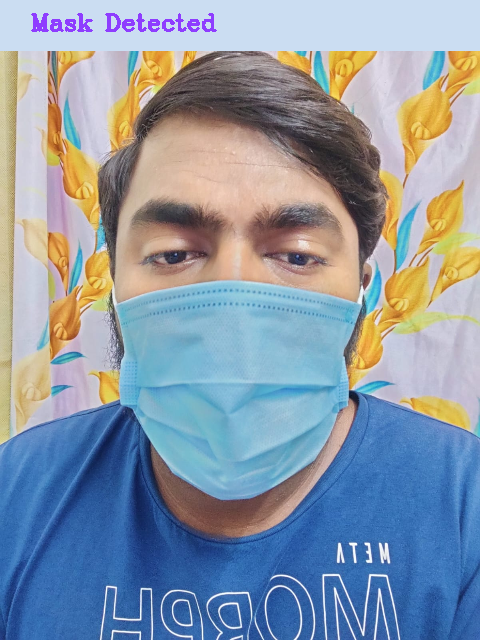

In [63]:
view_prediction(r"C:\Users\yaswa\OneDrive\Desktop\Face_Mask_Detection\Sai.jpg")

1/1 [==============================] - 0s 127ms/step


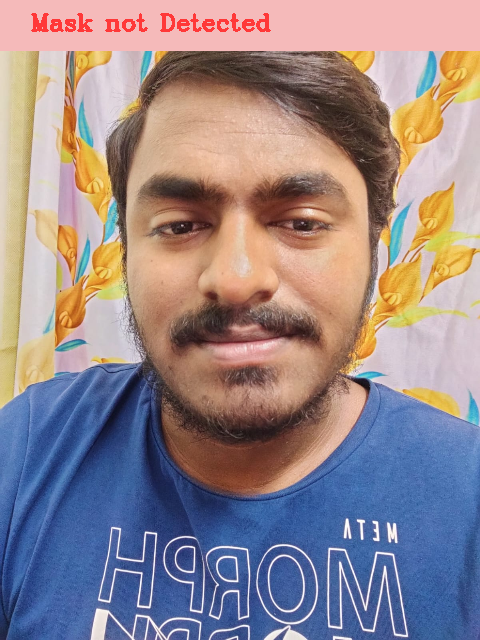

In [64]:
view_prediction(r'C:\Users\yaswa\OneDrive\Desktop\Face_Mask_Detection\Yaswanth.jpg')